In [62]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [63]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set() # seaborn 속성을 기본값으로 설정

파일에서 데이터를 읽어들임

In [64]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

#from enum import Enum
class Columns:
    # 원래 존재하는 항목
    PassengerId = "PassengerId"
    Survived = "Survived"
    Pclass = "Pclass"
    Name = "Name"
    Sex = "Sex"
    Age = "Age"
    SibSp = "SibSp"
    Parch = "Parch"
    Ticket = "Ticket"
    Fare = "Fare"
    Cabin = "Cabin"
    Embarked = "Embarked"
    
    # 새로 생성하는 항목
    Title = "Title"
    FareBand = "FareBand"
    Family = "Family"
    Deck = "Deck" # Cabin의 알파벳을 떼서 Deck을 지정한다.

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


test의 경우 예측에서 제출해야 하는 데이터이기에 Survived 항목이 없다.

In [66]:
print(test.head(n=test.shape[0]))

     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jon

## 입력 데이터 :

- **PassengerId** : 승객 번호<br>
- **Survived** : 생존여부(1: 생존, 0 : 사망)<br>
- **Pclass** : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)<br>
- **Name** : 승객 이름<br>
- **Sex** : 승객 성별 (male/female)<br>
- **Age** : 승객 나이(float) <br>
- **SibSp** : 동반한 형제자매, 배우자 수<br>
- **Parch** : 동반한 부모, 자식 수<br>
- **Ticket** : 티켓의 고유 넘버(문자열)<br>
- **Fare** 티켓의 요금(float)<br>
- **Cabin** : 객실 번호<br>
- **Embarked** : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)<br>



데이터가 존재하지 않는 feature들을 확인해 본다.

### 데이터 속성 확인

Pclass 에 따른 생존률

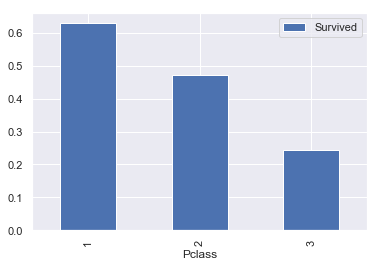

In [67]:
train[[Columns.Pclass, Columns.Survived]].groupby([Columns.Pclass]).mean().plot.bar()

성별에 따른 생존률

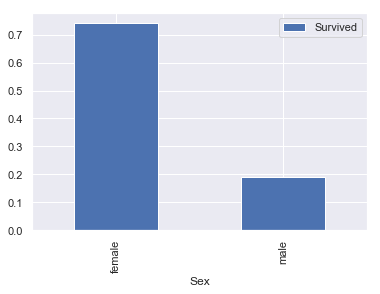

In [68]:
train[[Columns.Sex, Columns.Survived]].groupby([Columns.Sex]).mean().plot.bar()

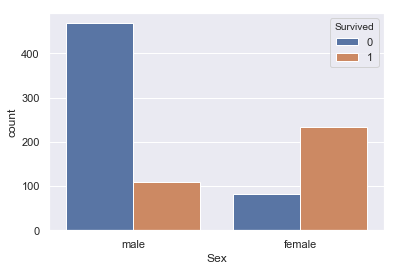

In [69]:
sns.countplot(x=Columns.Sex, hue=Columns.Survived, data=train)

Age에 따른 생존률

일단 Age의 분포는 어떨까?

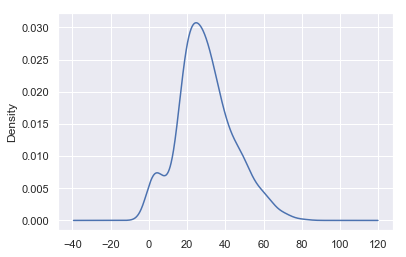

In [70]:
train[Columns.Age].plot.kde()

Age : 0  ~  80
gap: 6
[-1, 0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, inf]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


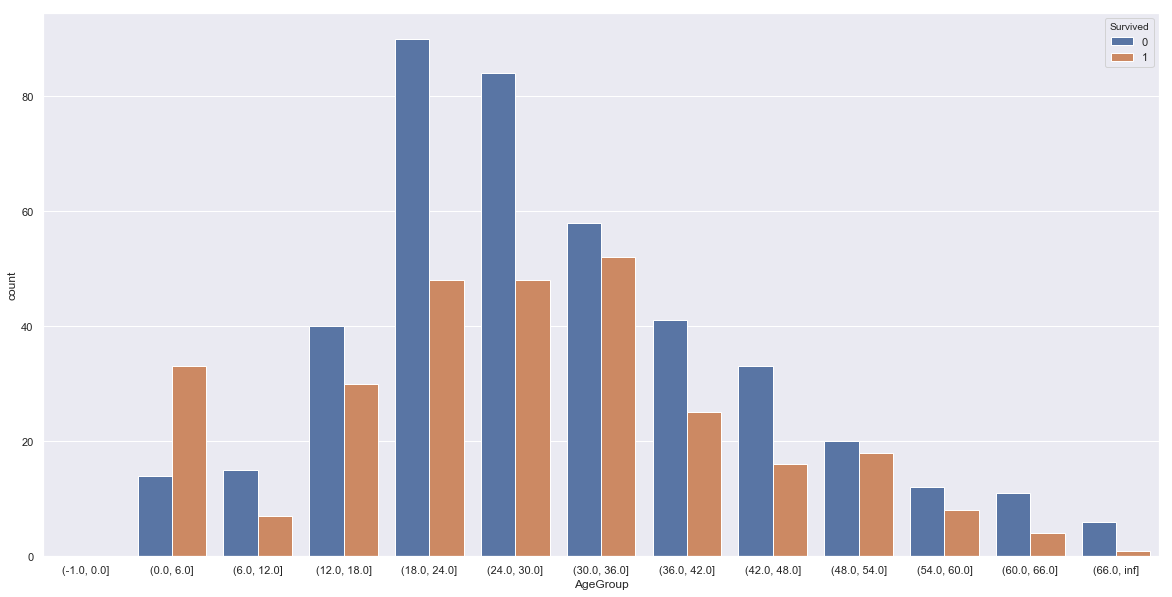

In [71]:
df = train[train[Columns.Age].isnull() == False]
#df.describe()

# 나이대로 나누어서 출력해 본다.
age_min = df[Columns.Age].min().astype('int')
age_max = df[Columns.Age].max().astype('int')
print("Age :", age_min, " ~ ", age_max)
gap = ((age_max - age_min) / 12).astype(int)
print('gap:', gap)

bins = [-1]
for i in range(12):
    bins.append(i * gap)
bins.append(np.inf)
print(bins)

_df = df
_df['AgeGroup'] = pd.cut(_df[Columns.Age], bins)
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot('AgeGroup', hue=Columns.Survived, data=_df, ax=ax)

Pclass/Age에 따른 생존률 변화량

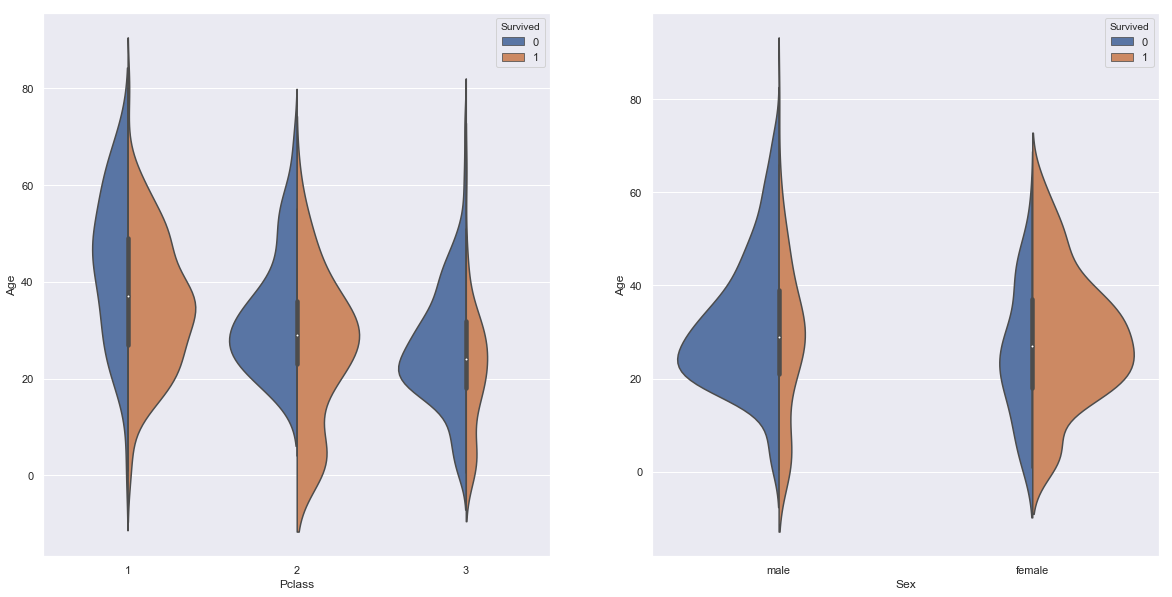

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.violinplot(Columns.Pclass, Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[0])
sns.violinplot(Columns.Sex, Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[1])

In [73]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

가족 수 ( Parch + SibSp + 1(자기자신))과 생존률을 비교해 본다.

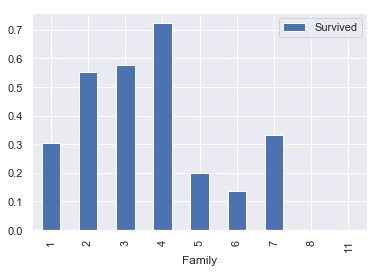

In [74]:
_train = train
_train['Family'] = _train[Columns.SibSp] + _train[Columns.Parch] + 1
_train[['Family', Columns.Survived]].groupby('Family').mean().plot.bar()

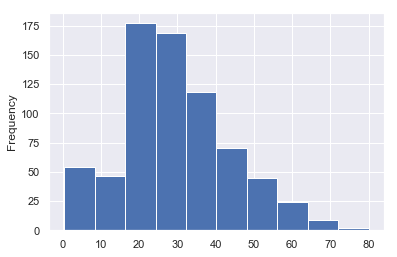

In [75]:
train[Columns.Age].plot.hist()

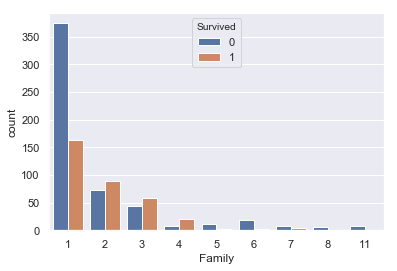

In [76]:
sns.countplot(x='Family', hue=Columns.Survived, data=_train)

### 데이터 가공

1. 비어있는 데이터(null)을 처리한다.<br>

###### 기존 feature들을 보완/가공
**Age** : null이 많고 나이가 중요할 것으로 판단되니 데이터를 채워야 할 필요가 있다.<br>
**Cabin** : null이 너무 많다.<br>
**Embarked** : null이 거의 없으므로 중요하지 않은 값으로 채워도 문제가 없어 보임<br>
**Parse, SibSp** : 합쳐서 Family로 만들고 삭제하자.

###### 새로운 feature를 추가
**Family** : Parch + SibSp + 1(자기자신)

## train/test를 따로 하지 말고, 합쳐서 처리하고 마지막(모델 넣기 직전)에 다시 분리한다.

In [77]:
train_len = train.shape[0]
merged = train.append(test, ignore_index=True)
merged.head(n=merged.shape[0])

,Age,Cabin,Embarked,Family,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,2.0,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,2.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,1.0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,1.0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,1.0,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,1.0,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,5.0,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,3.0,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,2.0,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


Parch와 SibSp를 Family로 변경한다.

In [78]:
merged[Columns.Family] = merged[Columns.Parch] + merged[Columns.SibSp] + 1
if Columns.Parch in merged:    
    merged = merged.drop([Columns.Parch], axis=1)
if Columns.SibSp in merged:
    merged = merged.drop([Columns.SibSp], axis=1)
    
merged.head()

,Age,Cabin,Embarked,Family,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket
0,22.0,NaN,S,2,7.2500,"Braund, Mr. Owen Harris",1,3,male,0.0,A/5 21171
1,38.0,C85,C,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,female,1.0,PC 17599
2,26.0,NaN,S,1,7.9250,"Heikkinen, Miss. Laina",3,3,female,1.0,STON/O2. 3101282
3,35.0,C123,S,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,female,1.0,113803
4,35.0,NaN,S,1,8.0500,"Allen, Mr. William Henry",5,3,male,0.0,373450


### Embarked 정리
빈 갯수가 몇개 없으므로 그냥 가장 많은 것으로 채운다.

In [79]:
most_embarked_label = merged[Columns.Embarked].value_counts().index[0]

merged.fillna({Columns.Embarked : most_embarked_label})
merged.describe(include="all")

,Age,Cabin,Embarked,Family,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket
count,1046.000000,295,1307,1309.000000,1308.000000,1309,1309.000000,1309.000000,1309,891.000000,1309
unique,NaN,186,3,NaN,NaN,1307,NaN,NaN,2,NaN,929
top,NaN,C23 C25 C27,S,NaN,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,CA. 2343
freq,NaN,6,914,NaN,NaN,2,NaN,NaN,843,NaN,11
mean,29.881138,NaN,NaN,1.883881,33.295479,NaN,655.000000,2.294882,NaN,0.383838,NaN
std,14.413493,NaN,NaN,1.583639,51.758668,NaN,378.020061,0.837836,NaN,0.486592,NaN
min,0.170000,NaN,NaN,1.000000,0.000000,NaN,1.000000,1.000000,NaN,0.000000,NaN
25%,21.000000,NaN,NaN,1.000000,7.895800,NaN,328.000000,2.000000,NaN,0.000000,NaN
50%,28.000000,NaN,NaN,1.000000,14.454200,NaN,655.000000,3.000000,NaN,0.000000,NaN
75%,39.000000,NaN,NaN,2.000000,31.275000,NaN,982.000000,3.000000,NaN,1.000000,NaN


In [80]:
mapping = pd.Series([1,2,3], ['S', 'C', 'Q'])
merged[Columns.Embarked] = merged[Columns.Embarked].map(mapping)

# float로 변경:
merged[Columns.Embarked] = merged[Columns.Embarked].astype('float')

In [81]:
merged.describe(include='all')

,Age,Cabin,Embarked,Family,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket
count,1046.000000,295,1307.000000,1309.000000,1308.000000,1309,1309.000000,1309.000000,1309,891.000000,1309
unique,NaN,186,NaN,NaN,NaN,1307,NaN,NaN,2,NaN,929
top,NaN,C23 C25 C27,NaN,NaN,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,CA. 2343
freq,NaN,6,NaN,NaN,NaN,2,NaN,NaN,843,NaN,11
mean,29.881138,NaN,1.394797,1.883881,33.295479,NaN,655.000000,2.294882,NaN,0.383838,NaN
std,14.413493,NaN,0.653817,1.583639,51.758668,NaN,378.020061,0.837836,NaN,0.486592,NaN
min,0.170000,NaN,1.000000,1.000000,0.000000,NaN,1.000000,1.000000,NaN,0.000000,NaN
25%,21.000000,NaN,1.000000,1.000000,7.895800,NaN,328.000000,2.000000,NaN,0.000000,NaN
50%,28.000000,NaN,1.000000,1.000000,14.454200,NaN,655.000000,3.000000,NaN,0.000000,NaN
75%,39.000000,NaN,2.000000,2.000000,31.275000,NaN,982.000000,3.000000,NaN,1.000000,NaN


Name에서 호칭을 추출해서 새 항목(Title)을 추가하고 숫자값으로 변환한다.
Name은 지운다.

In [82]:
# Name에서 Title 추출(그냥 알파벳 끝에 .이 붙어 있는걸 추출한다.)
merged[Columns.Title] = merged.Name.str.extract('([A-Za-z]+)\. ', expand=False) # expand:True면 DataFrame을, False면 Series를 리턴한다.

print("initial titles : ", merged[Columns.Title].value_counts().index)

# 정리
merged[Columns.Title] = merged[Columns.Title].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
merged[Columns.Title] = merged[Columns.Title].replace(['Countess', 'Sir'], 'Royal')
merged[Columns.Title] = merged[Columns.Title].replace(['Mlle'], 'Miss')
merged[Columns.Title] = merged[Columns.Title].replace(['Ms'], 'Miss')
merged[Columns.Title] = merged[Columns.Title].replace(['Mme'], 'Mrs')
    
print(merged[[Columns.Title, Columns.Survived]].groupby(Columns.Title).mean())

idxs = merged[Columns.Title].value_counts().index # 많은 순서대로 정렬해서 오름차순으로 값을 매김
print(idxs)
mapping = {}
for i in range(len(idxs)):
    mapping[idxs[i]] = i + 1
print(mapping)

merged[Columns.Title] = merged[Columns.Title].map(mapping)


if Columns.Name in merged:
    merged = merged.drop([Columns.Name], axis=1)
    
merged.head()

initial titles :  Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Mlle', 'Major',
       'Ms', 'Mme', 'Countess', 'Dona', 'Lady', 'Jonkheer', 'Capt', 'Sir',
       'Don'],
      dtype='object')
        Survived
Title           
Master  0.575000
Miss    0.702703
Mr      0.156673
Mrs     0.793651
Rare    0.285714
Royal   1.000000
Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rare', 'Royal'], dtype='object')
{'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5, 'Royal': 6}


,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title
0,22.0,NaN,1.0,2,7.2500,1,3,male,0.0,A/5 21171,1
1,38.0,C85,2.0,2,71.2833,2,1,female,1.0,PC 17599,3
2,26.0,NaN,1.0,1,7.9250,3,3,female,1.0,STON/O2. 3101282,2
3,35.0,C123,1.0,2,53.1000,4,1,female,1.0,113803,3
4,35.0,NaN,1.0,1,8.0500,5,3,male,0.0,373450,1


Sex 항목을 숫자로 변경

In [83]:
mapping = {'male':0, 'female':1}
merged[Columns.Sex] = merged[Columns.Sex].map(mapping)

In [84]:
merged.head(n=10)

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title
0,22.0,NaN,1.0,2,7.2500,1,3,0,0.0,A/5 21171,1
1,38.0,C85,2.0,2,71.2833,2,1,1,1.0,PC 17599,3
2,26.0,NaN,1.0,1,7.9250,3,3,1,1.0,STON/O2. 3101282,2
3,35.0,C123,1.0,2,53.1000,4,1,1,1.0,113803,3
4,35.0,NaN,1.0,1,8.0500,5,3,0,0.0,373450,1
5,NaN,NaN,3.0,1,8.4583,6,3,0,0.0,330877,1
6,54.0,E46,1.0,1,51.8625,7,1,0,0.0,17463,1
7,2.0,NaN,1.0,5,21.0750,8,3,0,0.0,349909,4
8,27.0,NaN,1.0,3,11.1333,9,3,1,1.0,347742,3
9,14.0,NaN,2.0,2,30.0708,10,2,1,1.0,237736,3


### 비어있는 Age를 처리

Title로 적당히 추리한다. (너무 때려맞추기가 아닌지...?)

In [85]:
# {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5, 'Royal': 6}

mapping = {1:21, 2:28, 3:28, 4:40, 5:50, 6:60}
def guess_age(row):
    return mapping[row[Columns.Title]]

def fixup_age(df):
    for idx, row in df[df[Columns.Age].isnull() == True].iterrows():
        df.loc[idx, Columns.Age] = guess_age(row)
    return df
    
merged = fixup_age(merged)
merged.describe(include='all')

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title
count,1309.000000,295,1307.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000,1309,1309.000000
unique,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,929,NaN
top,NaN,C23 C25 C27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN
freq,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN
mean,28.652154,NaN,1.394797,1.883881,33.295479,655.000000,2.294882,0.355997,0.383838,NaN,1.734148
std,13.274974,NaN,0.653817,1.583639,51.758668,378.020061,0.837836,0.478997,0.486592,NaN,1.027706
min,0.170000,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,1.000000
25%,21.000000,NaN,1.000000,1.000000,7.895800,328.000000,2.000000,0.000000,0.000000,NaN,1.000000
50%,27.000000,NaN,1.000000,1.000000,14.454200,655.000000,3.000000,0.000000,0.000000,NaN,1.000000
75%,36.000000,NaN,2.000000,2.000000,31.275000,982.000000,3.000000,1.000000,1.000000,NaN,2.000000


### Ticket 항목을 분석

In [88]:
merged[Columns.Ticket].unique().shape
print(merged[Columns.Ticket].unique().shape)
merged.head()

(929,)


,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title
0,22.0,NaN,1.0,2,7.2500,1,3,0,0.0,A/5 21171,1
1,38.0,C85,2.0,2,71.2833,2,1,1,1.0,PC 17599,3
2,26.0,NaN,1.0,1,7.9250,3,3,1,1.0,STON/O2. 3101282,2
3,35.0,C123,1.0,2,53.1000,4,1,1,1.0,113803,3
4,35.0,NaN,1.0,1,8.0500,5,3,0,0.0,373450,1


ticket 항목 중 중복되는 것이 있다는 것을 알 수 있다.
중복되는 항목들의 Fare를 찾아보면 모두 같다.
===> ticket이 중복되었다고 돈을 나눠야 할 이유는 없을지도...

No Cabin Fare: 19.132707206317864
Cabin Fare: 76.14150392156863


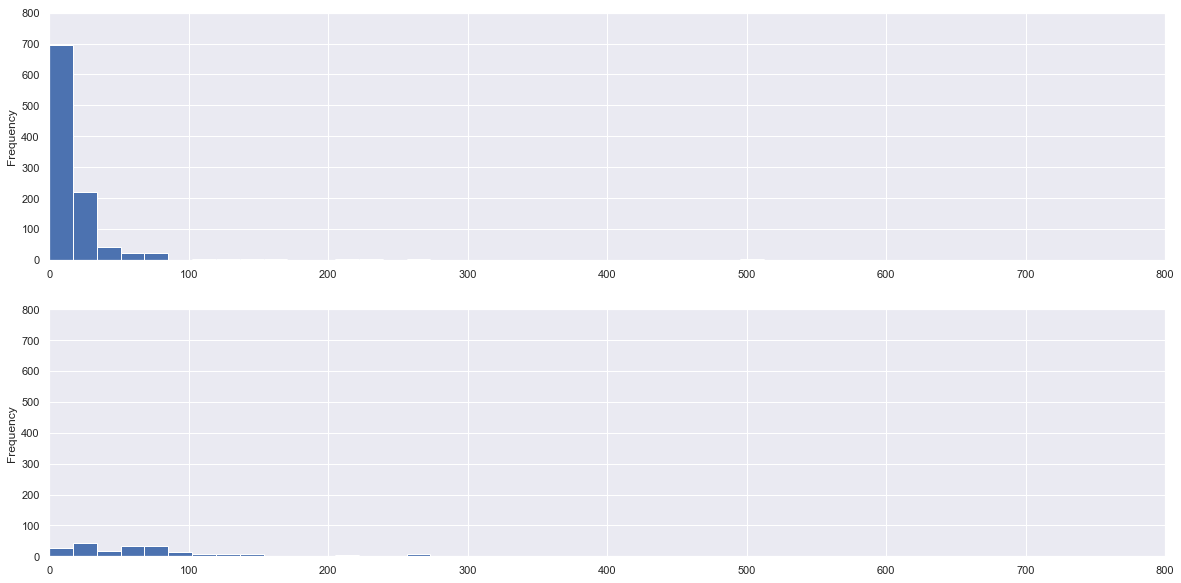

In [92]:
tickets = merged[Columns.Ticket]

df = merged

# 중복되는 ticket을 가진 사람들의 fare는? => 같다.
def show_shared_tickets(df):
    for ticket in tickets:
        if df[df[Columns.Ticket] == ticket].shape[0] > 1:
            print("\nTicket:", ticket)
            print(df[df[Columns.Ticket] == ticket][Columns.Fare], df[df[Columns.Ticket] == ticket][Columns.Cabin], \
                  df[df[Columns.Ticket] == ticket][Columns.Embarked])

#show_shared_tickets(df)
            
'''
표에 액수가 중복되었다고 돈을 나눌 필요는 없을 것 같아서 주석 처리함.
ticket number가 중복이어도 돈을 나눠서 찍었을 수도 있어서...
'''
'''
def divide_fare_by_shared_tickets(df):
    for ticket in tickets:
        tmpdf = df[df[Columns.Ticket] == ticket]
        if tmpdf.shape[0] > 1:
            total_fare = df[df[Columns.Ticket] == ticket][Columns.Fare].value_counts().index[0]            
            per_people = df[df[Columns.Ticket] == ticket].shape[0]            
            df[df[Columns.Ticket] == ticket][Columns.Fare] = total_fare / per_people
    return df
            
df = divide_fare_by_shared_tickets(df)
'''


#cabin / fare
#non-cabin / fare

# cabin이 있고/없고에 따른 fare의 차이
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].set_xlim([0, 800])
ax[1].set_xlim([0, 800])
ax[0].set_ylim([0, 800])
ax[1].set_ylim([0, 800])
df = df[df[Columns.Cabin].isnull()]
df[Columns.Fare].plot.hist(ax=ax[0], bins=30)
print("No Cabin Fare:", df[Columns.Fare].mean())

df = train[train[Columns.Cabin].isnull() == False]
df[Columns.Fare].plot.hist(ax=ax[1], bins=30)
print("Cabin Fare:", df[Columns.Fare].mean())



In [93]:
merged.head(n=100)

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title
0,22.00,NaN,1.0,2,7.2500,1,3,0,0.0,A/5 21171,1
1,38.00,C85,2.0,2,71.2833,2,1,1,1.0,PC 17599,3
2,26.00,NaN,1.0,1,7.9250,3,3,1,1.0,STON/O2. 3101282,2
3,35.00,C123,1.0,2,53.1000,4,1,1,1.0,113803,3
4,35.00,NaN,1.0,1,8.0500,5,3,0,0.0,373450,1
5,21.00,NaN,3.0,1,8.4583,6,3,0,0.0,330877,1
6,54.00,E46,1.0,1,51.8625,7,1,0,0.0,17463,1
7,2.00,NaN,1.0,5,21.0750,8,3,0,0.0,349909,4
8,27.00,NaN,1.0,3,11.1333,9,3,1,1.0,347742,3
9,14.00,NaN,2.0,2,30.0708,10,2,1,1.0,237736,3


In [94]:
def divide_fare_by_shared_tickets(df):
    for ticket in tickets:
        tmpdf = df[df[Columns.Ticket] == ticket]
        if tmpdf.shape[0] > 1:
            total_fare = tmpdf[Columns.Fare].values[0]
            per_people = tmpdf.shape[0]            
            #df[df[Columns.Ticket] == ticket][Columns.Fare] = total_fare / per_people
            df.loc[df[Columns.Ticket] == ticket, [Columns.Fare]] = total_fare / per_people
    return df
            
#merged = divide_fare_by_shared_tickets(merged)
#merged.head(n=100)

Cabin이 빈 사람은 같은 Ticket번호를 가진 다른 사람의 Cabin을 넣는다.
=>16명밖에 안 되므로 별 의미가 없을 것 같다.
=>하지 말자

In [95]:
def empty_cabin_but_oterhs_have_cabin_cnt(df):
    ret = 0    
    # cabin이 null이면 ticket이 같은걸 찾아서 cabin값을 가져온다.
    for idx, row in df[df[Columns.Cabin].isnull() == True].iterrows(): #Cabin이 없는 행에 대해        
        ticket = row[Columns.Ticket]
        cabin = df[df[Columns.Ticket] == ticket][Columns.Cabin].value_counts().index #같은 ticket을 가진 사람들 중 가장 많은 Cabin값을 가져온다.
        if len(cabin) > 0: #Cabin이 있으면 현제 row는 Cabin이 없지만 채울 수 있는 것이다.
            #print(row)
            ret = ret + 1
            
            
    return ret

#print("count of fillable cabin : ", empty_cabin_but_oterhs_have_cabin_cnt(merged))

In [96]:
tm = merged.copy()

tickets = merged[Columns.Ticket]

# 중복되는 ticket을 가진 사람들의 cabin은?
# ==> cabin값이 비어 있으면 ticket이 같은 다른 사람들의 cabin값으로 채운다.
def fixup_cabin_by_ticket(df):
    # cabin이 null이면 ticket이 같은걸 찾아서 cabin값을 가져온다.
    fixed = 0
    iterdf = df[df[Columns.Cabin].isnull() == True].copy()
    for idx, row in iterdf.iterrows(): # 각각의 행의 값을 읽어들일 필요가 있을 때.
        ticket = row[Columns.Ticket] # 현재 행의 ticket값을 얻는다.
        # 같은 ticket을 가진 다른 사용자들의 Cabin값들을 얻어온다.
        cabin = df[df[Columns.Ticket] == ticket][Columns.Cabin].value_counts().index
        if len(cabin) > 0: # 다른 사용자에게 Cabin이 있으면 
            df.loc[idx, Columns.Cabin] = cabin[0] # 그 값을 사용한다.
    
    # 검증단계:
    for ticket in tickets:        
        if df[df[Columns.Ticket] == ticket].shape[0] > 1:
            # 다 null이거나 다 null이 아니건나 해야 한다.
            '''
            아래 나누어서 한 이유는 : 
            아래와 같이 하게 되면,
            if df[df[Columns.Ticket] == ticket][df[Columns.Cabin].isnull() == True].shape[0] != 0 and df[df[Columns.Ticket] == ticket][df[Columns.Cabin].isnull() == False].shape[0] != 0:
            df[df[Columns.Ticket] == ticket]과 [df[Columns.Cabin].isnull() == True]의 크기가 달라져서,
            
                UserWarning: Boolean Series key will be reindexed to match DataFrame index.
            
            위와 같은 에러가 발생하기 때문이다.
            Pandas가 자동으로 index를 기준으로 boolean vector를 reindex해서 맞춰 주지만, implicit한 동작이어서 나중에 변경될 수 있으므로 warning으로 알려주는 것이다.
            다름 링크 내용을 참고한다.
            https://stackoverflow.com/questions/41710789/boolean-series-key-will-be-reindexed-to-match-dataframe-index            
            '''
            
            '''
            df2 = df[df[Columns.Ticket] == ticket] # ticket이 같은 것을 모두 모은다.
            if df2[df2[Columns.Cabin].isnull() == True].shape[0] != 0 and df2[df2[Columns.Cabin].isnull() == False].shape[0] != 0:
                print('Wrong!')
                print(df2[[Columns.Ticket, Columns.Cabin]])
            '''
    return df

#fixup_cabin_by_ticket(tm)

In [97]:
#merged = fixup_cabin_by_ticket(merged)

Cabin에서 알파벳을 추출해서 Deck항목을 추가한다.

In [98]:
def make_deck(df):
    '''
    Cabin에서 알파벳을 떼서 Deck 알파벳을 생성한다.
    '''
    df[Columns.Deck] = df[Columns.Cabin].str.extract('([A-Za-z]+)', expand=True)
    return df

merged = make_deck(merged)
merged.describe(include='all')

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck
count,1309.000000,295,1307.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000,1309,1309.000000,295
unique,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,929,NaN,8
top,NaN,C23 C25 C27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,C
freq,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,94
mean,28.652154,NaN,1.394797,1.883881,33.295479,655.000000,2.294882,0.355997,0.383838,NaN,1.734148,NaN
std,13.274974,NaN,0.653817,1.583639,51.758668,378.020061,0.837836,0.478997,0.486592,NaN,1.027706,NaN
min,0.170000,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,1.000000,NaN
25%,21.000000,NaN,1.000000,1.000000,7.895800,328.000000,2.000000,0.000000,0.000000,NaN,1.000000,NaN
50%,27.000000,NaN,1.000000,1.000000,14.454200,655.000000,3.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,36.000000,NaN,2.000000,2.000000,31.275000,982.000000,3.000000,1.000000,1.000000,NaN,2.000000,NaN


In [100]:
merged[[Columns.Deck, Columns.Fare]].groupby(Columns.Deck).mean().sort_values(by=Columns.Fare)

,Fare
Deck,
G,14.205000
F,18.079367
T,35.500000
A,41.244314
D,53.007339
E,54.564634
C,107.926598
B,122.383078


Deck과 Survived의 상관관계를 확인하자.

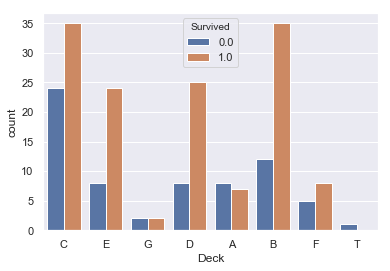

In [102]:
sns.countplot(x=Columns.Deck, hue=Columns.Survived, data=merged)

Deck과 Fare에 따라 생존 수를 확인해 본다.

total survived rate:  0.3838383838383838
deck survived rate:  0.6666666666666666
no deck survived rate:  0.29985443959243085
Fare : 0  ~  512
gap: 102
[-1, 0, 102, 204, 306, 408, inf]


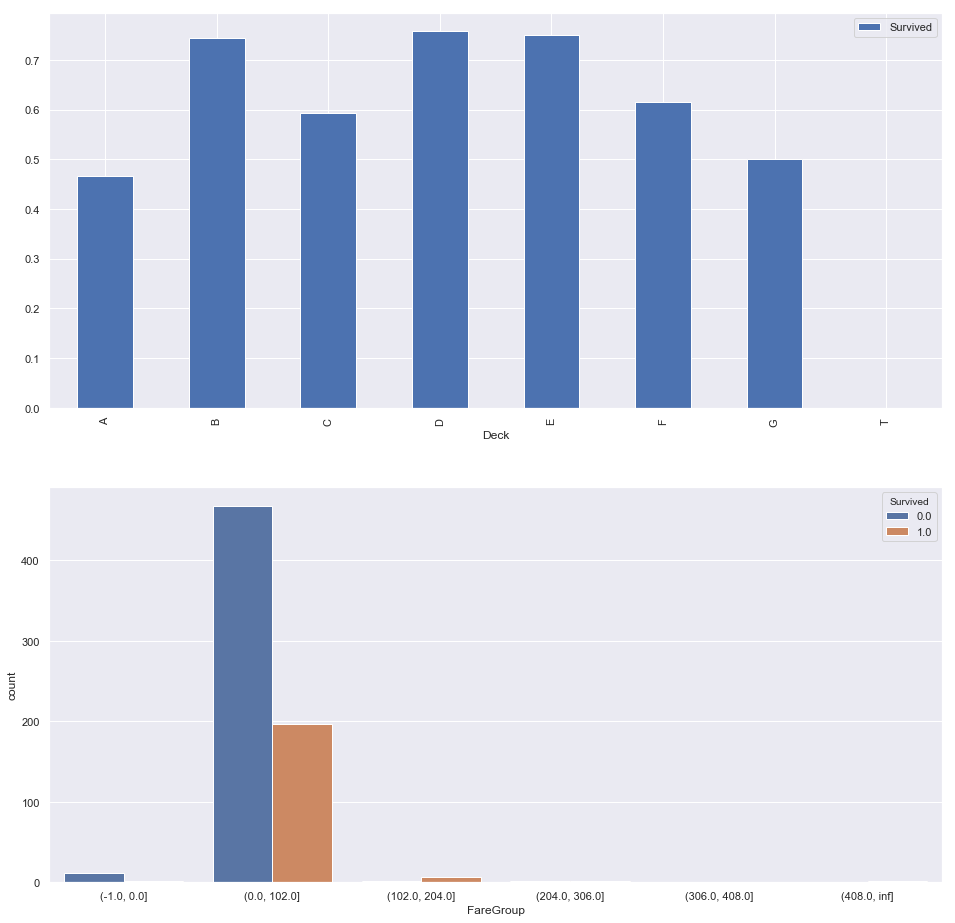

In [103]:
print("total survived rate: ", merged[Columns.Survived].mean())
print("deck survived rate: ", merged[merged[Columns.Deck].isnull() == False][Columns.Survived].mean())
print("no deck survived rate: ", merged[merged[Columns.Deck].isnull()][Columns.Survived].mean())

fig, ax = plt.subplots(2, 1, figsize=(16, 16))
merged[[Columns.Deck, Columns.Survived]].groupby(Columns.Deck).mean().plot.bar(ax=ax[0])

def generate_fare_group(df, slicenum):
    if "FareGroup" in df:
        df.drop("FareGroup", axis=1)
    # 나이대로 나누어서 출력해 본다.
    _min = df[Columns.Fare].min().astype('int')
    _max = df[Columns.Fare].max().astype('int')
    print("Fare :", _min, " ~ ", _max)
    gap = ((_max - _min) / slicenum).astype(int)
    print('gap:', gap)

    bins = [-1]
    for i in range(slicenum):
        bins.append(i * gap)
    bins.append(np.inf)
    print(bins)
    df['FareGroup'] = pd.cut(df[Columns.Fare], bins)    
    return df

df = generate_fare_group(merged.copy(), 5)

sns.countplot(x="FareGroup", hue=Columns.Survived, data=df[df[Columns.Deck].isnull()], ax=ax[1])


In [108]:
merged[merged[Columns.Deck].isnull()][Columns.Survived].mean()
merged[merged[Columns.Deck].isnull()==False][Columns.Survived].mean()

0.6666666666666666

비어있는 Deck을 채워야 한다.
간단히 액수로만 rough하게 채우는데, 이게 더 불필요하고 도움이 되지 않을 수도 있다.

Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='Deck')


,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck
0,22.0,NaN,1.0,2,7.2500,1,3,0,0.0,A/5 21171,1,1
1,38.0,C85,2.0,2,71.2833,2,1,1,1.0,PC 17599,3,7
2,26.0,NaN,1.0,1,7.9250,3,3,1,1.0,STON/O2. 3101282,2,1
3,35.0,C123,1.0,2,53.1000,4,1,1,1.0,113803,3,7
4,35.0,NaN,1.0,1,8.0500,5,3,0,0.0,373450,1,1


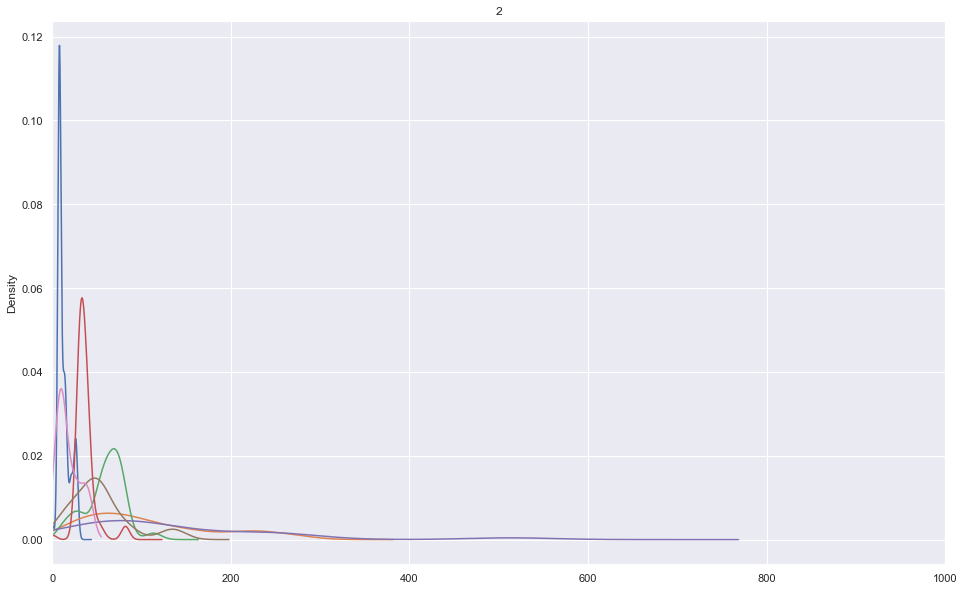

In [111]:
#df[[Columns.Deck, Columns.Fare]].groupby([Columns.Deck]).mean().plot.bar()  # Deck에 따른 요금제

'''
Deck            
G      13.581250
F      18.958329
T      35.500000
A      39.623887
E      44.950127
D      57.244576
C     106.152051
B     121.814585
'''

def guess_deck_by_fare(fare):
    if fare < 30.0:
        return 'G'
    elif fare  < 42.0:
        return 'A'
    elif fare < 50.0:
        return 'E'
    elif fare < 80.0:
        return 'D'
    elif fare < 110.0:
        return 'C'
    else:
        return 'B'

def fill_empty_decks(df):
    '''
    비어있는 Deck을 Fare값으로 추정해서 채운다.
    '''
    for idx, row in df[df[Columns.Deck].isnull() == True].iterrows():
        df.loc[idx, Columns.Deck] = guess_deck_by_fare(row[Columns.Fare])
    return df

merged = fill_empty_decks(merged)

# Cabin을 숫자로 변경한다.
def cabin_as_number(df):
    mean_values = df[[Columns.Deck, Columns.Fare]].groupby([Columns.Deck]).mean().sort_values(by=[Columns.Fare])
    print(mean_values.index)
    mapping = {}
    for i in range(mean_values.shape[0]):
        #print("mean_value=", mean_values[Columns.Deck])
        mapping[mean_values.index[i]] = i + 1
    df[Columns.Deck] = df[Columns.Deck].map(mapping)
    return df

merged = cabin_as_number(merged)
    
'''
Deck 마다 Fare의 분포를 그래프로 그려서 확인한다.
'''
decks = merged[Columns.Deck].value_counts().index
#print(decks.shape)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
for i in range(decks.shape[0]-1):    
    ax.set_xlim([0, 1000])
    ax.set_title(decks[i])
    values = merged[merged[Columns.Deck] == decks[i]][Columns.Fare]
    values.plot(kind='kde', ax=ax, use_index=True, label=str(i))

merged.head()

### Fare 정리

null인 항목이 있다.

In [112]:
merged[merged[Columns.Fare].isnull()]

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck
1043,60.5,NaN,1.0,1,NaN,1044,3,0,NaN,3701,1,8


하나만 있으므로 그냥 평균값을 넣어준다.

In [113]:
merged.loc[merged[Columns.Fare].isnull(), [Columns.Fare]] = merged[Columns.Fare].mean()

In [114]:
merged.head()

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck
0,22.0,NaN,1.0,2,7.2500,1,3,0,0.0,A/5 21171,1,1
1,38.0,C85,2.0,2,71.2833,2,1,1,1.0,PC 17599,3,7
2,26.0,NaN,1.0,1,7.9250,3,3,1,1.0,STON/O2. 3101282,2,1
3,35.0,C123,1.0,2,53.1000,4,1,1,1.0,113803,3,7
4,35.0,NaN,1.0,1,8.0500,5,3,0,0.0,373450,1,1


Fare(요금) 항목의 분포를 check해 보자.

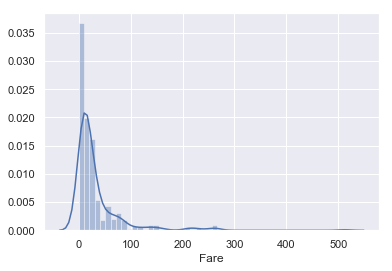

In [115]:
sns.distplot(merged[Columns.Fare])

distribution이 비대칭인 것을 알 수 있다.(high skewness). <br>
모델의 학습에 좋지 않은 영향을 미친다고 한다. <br>
outlier의 영향을 줄이기 위해 log를 취한 값을 사용할 수 있다.
다른 방법으로는 그냥 동수로 그룹을 나누어서 할 수도 있다.

In [116]:
'''
log를 취하는 방법
'''

#merged[Columns.Fare] = merged[Columns.Fare].map(lambda i : np.log(i) if i > 0 else 0)

'''
등급을 4단계로 나누는 방법
'''
merged[Columns.FareBand] = pd.qcut(merged[Columns.Fare], 4, labels=[1,2,3,4]).astype('float')
#merged[Columns.Fare] = merged[Columns.FareBand]

merged.head(n=20)


,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck,FareBand
0,22.0,NaN,1.0,2,7.2500,1,3,0,0.0,A/5 21171,1,1,1.0
1,38.0,C85,2.0,2,71.2833,2,1,1,1.0,PC 17599,3,7,4.0
2,26.0,NaN,1.0,1,7.9250,3,3,1,1.0,STON/O2. 3101282,2,1,2.0
3,35.0,C123,1.0,2,53.1000,4,1,1,1.0,113803,3,7,4.0
4,35.0,NaN,1.0,1,8.0500,5,3,0,0.0,373450,1,1,2.0
5,21.0,NaN,3.0,1,8.4583,6,3,0,0.0,330877,1,1,2.0
6,54.0,E46,1.0,1,51.8625,7,1,0,0.0,17463,1,5,4.0
7,2.0,NaN,1.0,5,21.0750,8,3,0,0.0,349909,4,1,3.0
8,27.0,NaN,1.0,3,11.1333,9,3,1,1.0,347742,3,1,2.0
9,14.0,NaN,2.0,2,30.0708,10,2,1,1.0,237736,3,4,3.0


In [117]:
merged[Columns.Fare] = merged[Columns.FareBand]

In [118]:
merged[Columns.Fare] = merged[Columns.FareBand]
merged = merged.drop([Columns.FareBand], axis=1)
merged.head()

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck
0,22.0,NaN,1.0,2,1.0,1,3,0,0.0,A/5 21171,1,1
1,38.0,C85,2.0,2,4.0,2,1,1,1.0,PC 17599,3,7
2,26.0,NaN,1.0,1,2.0,3,3,1,1.0,STON/O2. 3101282,2,1
3,35.0,C123,1.0,2,4.0,4,1,1,1.0,113803,3,7
4,35.0,NaN,1.0,1,2.0,5,3,0,0.0,373450,1,1


In [119]:
merged.head()

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck
0,22.0,NaN,1.0,2,1.0,1,3,0,0.0,A/5 21171,1,1
1,38.0,C85,2.0,2,4.0,2,1,1,1.0,PC 17599,3,7
2,26.0,NaN,1.0,1,2.0,3,3,1,1.0,STON/O2. 3101282,2,1
3,35.0,C123,1.0,2,4.0,4,1,1,1.0,113803,3,7
4,35.0,NaN,1.0,1,2.0,5,3,0,0.0,373450,1,1


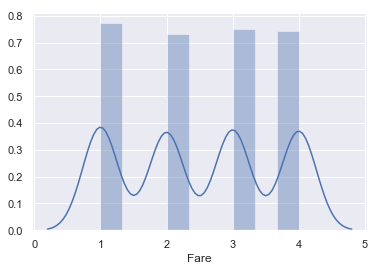

In [120]:
sns.distplot(merged[Columns.Fare])

In [121]:
merged.head()

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck
0,22.0,NaN,1.0,2,1.0,1,3,0,0.0,A/5 21171,1,1
1,38.0,C85,2.0,2,4.0,2,1,1,1.0,PC 17599,3,7
2,26.0,NaN,1.0,1,2.0,3,3,1,1.0,STON/O2. 3101282,2,1
3,35.0,C123,1.0,2,4.0,4,1,1,1.0,113803,3,7
4,35.0,NaN,1.0,1,2.0,5,3,0,0.0,373450,1,1


Embarked 채움

In [126]:
print(merged[merged[Columns.Embarked].isnull()])
print(merged[[Columns.Embarked, Columns.Survived]].groupby(Columns.Embarked).mean())
#sns.countplot(x=Columns.Embarked, hue=Columns.Survived, data=merged)
# 둘 다 살아 있으니 그냥 생존률이 높은 곳으로 넣어주자.
#merged[merged[Columns.Embarked].isnull()][Columns.Embarked] = 2.0
#merged.loc[merged[Columns.Embarked].isnull(), [Columns.Embarked]] = 2.0
merged.loc[lambda df : df[Columns.Embarked].isnull(), [Columns.Embarked]] = 2.0
print(merged[merged[Columns.Embarked].isnull()])

Empty DataFrame
Columns: [Age, Cabin, Embarked, Family, Fare, PassengerId, Pclass, Sex, Survived, Ticket, Title, Deck]
Index: []
          Survived
Embarked          
1.0       0.336957
2.0       0.558824
3.0       0.389610
Empty DataFrame
Columns: [Age, Cabin, Embarked, Family, Fare, PassengerId, Pclass, Sex, Survived, Ticket, Title, Deck]
Index: []


In [127]:
merged.describe(include='all')


,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck
count,1309.000000,295,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309,1309.000000,1309.000000
unique,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,929,NaN,NaN
top,NaN,C23 C25 C27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,NaN
freq,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN
mean,28.652154,NaN,1.395722,1.883881,2.488159,655.000000,2.294882,0.355997,0.383838,NaN,1.734148,2.576776
std,13.274974,NaN,0.653745,1.583639,1.122833,378.020061,0.837836,0.478997,0.486592,NaN,1.027706,2.465594
min,0.170000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,1.000000,1.000000
25%,21.000000,NaN,1.000000,1.000000,1.000000,328.000000,2.000000,0.000000,0.000000,NaN,1.000000,1.000000
50%,27.000000,NaN,1.000000,1.000000,2.000000,655.000000,3.000000,0.000000,0.000000,NaN,1.000000,1.000000
75%,36.000000,NaN,2.000000,2.000000,3.000000,982.000000,3.000000,1.000000,1.000000,NaN,2.000000,4.000000


전처리가 다 되었으면 다음 과정을 수행한다.

- 불필요한 열 삭제
- scaling
- train/test로 다시 분리
- train을 input/label로 분리(Survived)

불필요한 열 삭제

In [128]:
if Columns.Ticket in merged:
    merged = merged.drop(labels=[Columns.Ticket], axis=1)
if Columns.Cabin in merged:
    merged = merged.drop(labels=[Columns.Cabin], axis=1)

# passengerId는 나중에 삭제한다.
# if Columns.PassengerId in merged:
#     merged = merged.drop(labels=[Columns.PassengerId], axis=1)

In [129]:
merged.describe(include='all')

,Age,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Title,Deck
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000
mean,28.652154,1.395722,1.883881,2.488159,655.000000,2.294882,0.355997,0.383838,1.734148,2.576776
std,13.274974,0.653745,1.583639,1.122833,378.020061,0.837836,0.478997,0.486592,1.027706,2.465594
min,0.170000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,21.000000,1.000000,1.000000,1.000000,328.000000,2.000000,0.000000,0.000000,1.000000,1.000000
50%,27.000000,1.000000,1.000000,2.000000,655.000000,3.000000,0.000000,0.000000,1.000000,1.000000
75%,36.000000,2.000000,2.000000,3.000000,982.000000,3.000000,1.000000,1.000000,2.000000,4.000000
max,80.000000,3.000000,11.000000,4.000000,1309.000000,3.000000,1.000000,1.000000,6.000000,8.000000


In [130]:
merged.head(n=10)

,Age,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Title,Deck
0,22.0,1.0,2,1.0,1,3,0,0.0,1,1
1,38.0,2.0,2,4.0,2,1,1,1.0,3,7
2,26.0,1.0,1,2.0,3,3,1,1.0,2,1
3,35.0,1.0,2,4.0,4,1,1,1.0,3,7
4,35.0,1.0,1,2.0,5,3,0,0.0,1,1
5,21.0,3.0,1,2.0,6,3,0,0.0,1,1
6,54.0,1.0,1,4.0,7,1,0,0.0,1,5
7,2.0,1.0,5,3.0,8,3,0,0.0,4,1
8,27.0,1.0,3,2.0,9,3,1,1.0,3,1
9,14.0,2.0,2,3.0,10,2,1,1.0,3,4


입력 데이터를 0~1로 scaling하는 함수

In [131]:
from sklearn.preprocessing import MinMaxScaler

class NoColumnError(Exception):
    """Raised when no column in dataframe"""
    def __init__(self, value):
        self.value = value
    # __str__ is to print() the value
    def __str__(self):
        return(repr(self.value))

# normalize AgeGroup
def normalize_column(data, columnName):
    scaler = MinMaxScaler(feature_range=(0, 10))    
    if columnName in data:
        aaa = scaler.fit_transform(data[columnName].values.reshape(-1, 1)) # 입력을 2D 데이터로 넣어야 하므로 reshape해 준다.
        aaa = aaa.reshape(-1,) # 다시 원복해서 넣어주지만, 그냥 넣어도 알아서 제대로 들어간다...
        #print(aaa.shape)
        data[columnName] = aaa
        return data
    else:
        raise NoColumnError(str(columnName) + " is not exists!")

def normalize(dataset, columns):
    for col in columns:
        dataset = normalize_column(dataset, col)
    return dataset
#     dataset = normalize_column(dataset, Columns.Age)
#     dataset = normalize_column(dataset, Columns.Pclass)
#     dataset = normalize_column(dataset, Columns.Embarked)
#     dataset = normalize_column(dataset, Columns.Title)
#     dataset = normalize_column(dataset, Columns.SibSp)    
#     dataset = normalize_column(dataset, Columns.FareBand)    
#     dataset = normalize_column(dataset, Columns.Parch)

In [132]:
merged.head()

,Age,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Title,Deck
0,22.0,1.0,2,1.0,1,3,0,0.0,1,1
1,38.0,2.0,2,4.0,2,1,1,1.0,3,7
2,26.0,1.0,1,2.0,3,3,1,1.0,2,1
3,35.0,1.0,2,4.0,4,1,1,1.0,3,7
4,35.0,1.0,1,2.0,5,3,0,0.0,1,1


In [133]:
merged = normalize(merged, [Columns.Pclass, Columns.Age, Columns.Fare, Columns.Embarked, Columns.Family, Columns.Title, Columns.Deck])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [134]:
merged.head(n=10)

,Age,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Title,Deck
0,2.734561,0.0,1.0,0.000000,1,10.0,0,0.0,0.0,0.000000
1,4.738820,5.0,1.0,10.000000,2,0.0,1,1.0,4.0,8.571429
2,3.235626,0.0,0.0,3.333333,3,10.0,1,1.0,2.0,0.000000
3,4.363021,0.0,1.0,10.000000,4,0.0,1,1.0,4.0,8.571429
4,4.363021,0.0,0.0,3.333333,5,10.0,0,0.0,0.0,0.000000
5,2.609295,10.0,0.0,3.333333,6,10.0,0,0.0,0.0,0.000000
6,6.743079,0.0,0.0,10.000000,7,0.0,0,0.0,0.0,5.714286
7,0.229237,0.0,4.0,6.666667,8,10.0,0,0.0,6.0,0.000000
8,3.360892,0.0,2.0,3.333333,9,10.0,1,1.0,4.0,0.000000
9,1.732431,5.0,1.0,6.666667,10,5.0,1,1.0,4.0,4.285714


merged를 train/test로 분리한다.

In [135]:
train = merged[:train_len]
test = merged[train_len:]
test = test.drop([Columns.Survived], axis=1)

train = train.drop([Columns.PassengerId], axis=1)

test_passenger_id = test[Columns.PassengerId]
test = test.drop([Columns.PassengerId], axis=1)

print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [136]:
train_X = train.drop([Columns.Survived], axis=1).values #Series.values는 numpy array 타입의 데이터임
train_Y = train[Columns.Survived].values.reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

(891, 8)
(891, 1)


In [137]:
test.shape

(418, 8)

In [138]:
test.describe(include='all')

,Age,Embarked,Family,Fare,Pclass,Sex,Title,Deck
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,3.607079,2.320574,0.839713,4.952153,6.327751,0.363636,1.483254,2.221463
std,1.637534,3.427580,1.519072,3.829618,4.209188,0.481622,2.012183,3.521045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.609295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.235626,0.000000,0.000000,3.333333,10.000000,0.000000,0.000000,0.000000
75%,4.488288,5.000000,1.000000,10.000000,10.000000,1.000000,2.000000,4.285714
max,9.498935,10.000000,10.000000,10.000000,10.000000,1.000000,8.000000,10.000000


In [139]:
import tensorflow as tf

train_X = train_X.astype(np.float32)
train_Y = train_Y.astype(np.float32)
print(train_X.shape)
print(train_Y.shape)

X = tf.placeholder(tf.float32, shape=[None, train_X.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None, 1])

learning_rate = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
    
def build_neural_network(X):    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(X, 20, activation=None, kernel_initializer=initializer)
    fc = tf.nn.relu(fc)
    fc = tf.nn.dropout(fc, keep_prob=keep_prob)
    
    fc = tf.layers.dense(fc, 8, activation=None, kernel_initializer=initializer)
    fc = tf.nn.relu(fc)
    fc = tf.nn.dropout(fc, keep_prob=keep_prob)
    
    logits = tf.layers.dense(fc, 1, activation=None)    
    return logits

def get_batch(i, x, y, batch_size=32):
    end = (i + 1) * batch_size
    if end > x.shape[0]:        
        end = x.shape[0]        
    batch_x = x[i * batch_size : end]
    batch_y = y[i * batch_size : end]
    #print("get_batch:", batch_x.shape, batch_y.shape)
    return batch_x, batch_y

logits = build_neural_network(X)
# print(logits)
# print(train_Y.shape)
a = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits)
cost = tf.reduce_mean(a)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
prediction = tf.nn.sigmoid(logits)
is_correct = tf.equal(tf.round(prediction), Y)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

epochs = 250
batch_size = 32
num_batch = train_X.shape[0] // batch_size
print("num_batch=", num_batch)
lr = 0.01
kp = 0.7

from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        avg_cost = 0
        for batch_idx in range(num_batch + 1):
            batch_x, batch_y = get_batch(batch_idx, train_X, train_Y, batch_size)
            c, _ = session.run([cost, optimizer], feed_dict={X:batch_x, Y:batch_y, learning_rate:lr, keep_prob:kp})
            avg_cost += (c / num_batch)
            
        print("epoch:", epoch, " cost:{:.9f}".format(avg_cost))
        
    print("accuracy:", accuracy.eval(session=session, feed_dict={X:train_X, Y:train_Y, keep_prob:1.0}))
    
    pred = session.run(prediction, feed_dict={X:test, keep_prob:1.0}) # (418,1)
    print(pred.shape)
    print("nan count:", np.count_nonzero(np.isnan(pred) == True))
    
    test_predict_result=binarizer.fit_transform(pred)
    test_predict_result=test_predict_result.astype(np.int32)
    #print(test_predict_result[:10])
    submission = pd.DataFrame({"PassengerId" : test_passenger_id, "Survived":test_predict_result.reshape(-1)})
    submission.to_csv('submission.csv', index=False)
    
    print(submission)

(891, 8)
(891, 1)
num_batch= 27
epoch: 0  cost:0.695639721
epoch: 1  cost:0.583211063
epoch: 2  cost:0.555821115
epoch: 3  cost:0.552795931
epoch: 4  cost:0.529906961
epoch: 5  cost:0.514036459
epoch: 6  cost:0.501899230
epoch: 7  cost:0.482009553
epoch: 8  cost:0.509363653
epoch: 9  cost:0.496187604
epoch: 10  cost:0.487090562
epoch: 11  cost:0.490571863
epoch: 12  cost:0.468115654
epoch: 13  cost:0.467152049
epoch: 14  cost:0.478888628
epoch: 15  cost:0.468587182
epoch: 16  cost:0.465487568
epoch: 17  cost:0.467096477
epoch: 18  cost:0.461767984
epoch: 19  cost:0.465390807
epoch: 20  cost:0.460201863
epoch: 21  cost:0.459749087
epoch: 22  cost:0.456400488
epoch: 23  cost:0.466145404
epoch: 24  cost:0.447663662
epoch: 25  cost:0.457688806
epoch: 26  cost:0.455239571
epoch: 27  cost:0.445172528
epoch: 28  cost:0.465039254
epoch: 29  cost:0.433294495
epoch: 30  cost:0.445910309
epoch: 31  cost:0.452744311
epoch: 32  cost:0.452625689
epoch: 33  cost:0.439307896
epoch: 34  cost:0.45534505